In [ ]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 73.7 MB/s eta 0:00:00


In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Visualizando dados do database

In [ ]:
base_car = pd.read_csv('honda_car_selling.csv')
base_car

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
...,...,...,...,...,...,...
994,2007,90000 kms,Petrol,Manual,1.22 Lakh,Honda Civic 1.8 V MT
995,2016,31500 kms,Petrol,Manual,4.25 Lakh,Honda Amaze S i-VTEC
996,2017,39735 kms,Petrol,Manual,5.10 Lakh,Honda Amaze S Petrol
997,2017,36000 kms,Petrol,Manual,6.10 Lakh,Honda City i VTEC S


In [ ]:
base_car.describe()

In [ ]:
base_car.isnull().sum()

In [ ]:
type(base_car)

In [ ]:
base_car.columns

Index(['Year', 'kms Driven', 'Fuel Type', 'Suspension', 'Price', 'Car Model'], dtype='object')

### Divisão entre previsores e classes

In [ ]:
X_car = base_car.iloc[:, 0:5].values

In [ ]:
X_car

array([[2019, '19006 kms ', ' Petrol ', ' Automatic', ' 9.29 Lakh'],
       [2021, '11936 kms ', ' Petrol ', ' Automatic', ' 13.95 Lakh'],
       [2018, '29635 kms ', ' Petrol ', ' Automatic', ' 9.95 Lakh'],
       ...,
       [2017, '39735 kms ', ' Petrol ', ' Manual', ' 5.10 Lakh'],
       [2017, '36000 kms ', ' Petrol ', ' Manual', ' 6.10 Lakh'],
       [2015, '35341 kms ', ' Diesel ', ' Manual', ' 3 Lakh']],
      dtype=object)

In [ ]:
X_car[0]

array([2019, '19006 kms ', ' Petrol ', ' Automatic', ' 9.29 Lakh'],
      dtype=object)

In [ ]:
y_car = base_car.iloc[:, 5].values

In [ ]:
y_car

In [ ]:
y_car = y_car.reshape(-1,1)

In [ ]:
y_car

### Tratamento de atributos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
X_car[:,1]

In [ ]:
teste = label_encoder_teste.fit_transform(X_car[:,1])

In [ ]:
teste

In [ ]:
label_encoder_kms_driven = LabelEncoder()
label_encoder_fuel_type = LabelEncoder()
label_encoder_suspension = LabelEncoder()
label_encoder_price = LabelEncoder()
label_encoder_car_model = LabelEncoder()

In [ ]:
X_car[:,1] = label_encoder_kms_driven.fit_transform(X_car[:,1])
X_car[:,2] = label_encoder_fuel_type.fit_transform(X_car[:,2])
X_car[:,3] = label_encoder_suspension.fit_transform(X_car[:,3])
X_car[:,4] = label_encoder_price.fit_transform(X_car[:,4])
y_car[:,0] = label_encoder_car_model.fit_transform(y_car[:,0])

In [ ]:
X_car

In [ ]:
len(np.unique(base_car['kms Driven']))

### Não precisa realizar o procedimento do OneHotEncoder por ser um database pequeno

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_car = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 2, 3, 4])], remainder='passthrough')

In [ ]:
X_car = onehotencoder_car.fit_transform(X_car).toarray()

In [ ]:
X_car

In [ ]:
X_car.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_car = StandardScaler()

In [ ]:
X_car = scaler_car.fit_transform(X_car)

In [ ]:
X_car[0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_car_treinamento, X_car_teste, y_car_treinamento, y_car_teste = train_test_split(X_car, y_car, test_size=0.15, random_state=0)

In [ ]:
X_car_treinamento.shape, y_car_treinamento.shape

In [ ]:
X_car_teste.shape, y_car_teste.shape

In [ ]:
import pickle

In [ ]:
with open('car.pkl', mode = 'wb') as f:
  pickle.dump([X_car_treinamento, X_car_teste, y_car_treinamento, y_car_teste], f)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_car = GaussianNB()
naive_car.fit(X_car, y_car)

In [ ]:
previsao = naive_car.predict([[2019, 154, 2, 0, 319], [2021, 58, 2, 0, 60]])

In [ ]:
previsao

array(['Honda Amaze VX CVT Petrol', 'Honda City ZX CVT'], dtype='<U25')

In [ ]:
naive_car.classes_

In [ ]:
naive_car.class_count_

array([ 4.,  1.,  1.,  7.,  1.,  2.,  1.,  1.,  3.,  3.,  5.,  5.,  3.,
        1.,  2.,  4.,  3.,  2.,  1.,  2.,  1.,  4.,  1.,  2.,  1., 17.,
        9.,  1.,  3., 35., 16., 25.,  2.,  1.,  6.,  2.,  1.,  7.,  1.,
        4.,  5.,  3.,  1.,  4.,  1.,  1.,  1.,  4.,  1.,  2.,  5.,  5.,
        5.,  2.,  3.,  4.,  1.,  2.,  5.,  6.,  1.,  3.,  3.,  2., 33.,
        3.,  1.,  6.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  6.,  2.,
        1.,  1.,  3.,  1., 11.,  1.,  5.,  2.,  9., 47.,  8.,  2., 16.,
        1.,  1.,  1.,  1.,  6.,  3., 18., 15.,  5., 10.,  3., 26.,  2.,
        4.,  4.,  4., 12.,  8.,  2.,  6., 16., 17., 15.,  1.,  2.,  3.,
        2.,  1., 10., 21.,  8., 25., 38., 18.,  2.,  3.,  2.,  3.,  6.,
       15., 16.,  1.,  4.,  8.,  3.,  2.,  4.,  1.,  2.,  3.,  6.,  1.,
       17.,  1.,  2.,  1.,  2.,  1.,  1.,  7.,  6., 16., 12.,  7.,  2.,
        2.,  3.,  5.,  6.,  3.,  1.,  4.,  8.,  1.,  3.,  4.,  1.,  1.,
        3.,  4.,  1.,  2.,  3.,  4.,  2.,  1.,  2.,  1.,  2., 17

In [ ]:
naive_car.class_prior_

In [ ]:
with open('car.pkl', 'rb') as f:
  X_car_treinamento, y_car_treinamento, X_car_teste, y_car_teste = pickle.load(f)

In [ ]:
naive_car = GaussianNB()
naive_car.fit(X_car_teste, y_car_teste)
previsoes = naive_car.predict(X_car_teste)
previsoes

array(['Honda Amaze S Petrol BSIV', 'Honda Amaze S i-Dtech',
       'Honda Jazz 1.2 VX i VTEC', 'Honda City i VTEC V',
       'Honda Jazz V CVT', 'Honda City SV MT', 'Honda City i VTEC VX',
       'Honda BR-V i-DTEC S MT', 'Honda City i DTEC S',
       'Honda City i VTEC V', 'Honda City 1.5 E MT',
       'Honda Amaze VX CVT Petrol', 'Honda Civic 1.8 V MT',
       'Honda CR-V 2.4L 4WD AT AV', 'Honda Amaze S Petrol',
       'Honda Amaze S i-Dtech', 'Honda Jazz 1.5 VX i DTEC',
       'Honda Amaze S Petrol BSIV', 'Honda Amaze SX i-VTEC',
       'Honda City 1.5 S MT', 'Honda Amaze EX i-Dtech',
       'Honda Civic 1.8 MT Sport', 'Honda City i VTEC V',
       'Honda Jazz 1.2 VX i VTEC', 'Honda City i-VTEC CVT V',
       'Honda City ZX MT', 'Honda City ZX CVT',
       'Honda City i VTEC CVT SV', 'Honda Amaze VX i-VTEC',
       'Honda City 1.5 V AT Sunro', 'Honda City i DTEC V',
       'Honda City i VTEC VX', 'Honda Civic 1.8 V AT',
       'Honda City i DTEC V', 'Honda City i DTEC SV',
       '

In [ ]:
y_car_teste

array(['Honda Amaze S Petrol BSIV', 'Honda Amaze S i-Dtech',
       'Honda Jazz 1.2 VX i VTEC', 'Honda City i VTEC V',
       'Honda Jazz V CVT', 'Honda City SV MT', 'Honda City i VTEC VX',
       'Honda BR-V i-DTEC S MT', 'Honda City i DTEC S',
       'Honda City i VTEC V', 'Honda City 1.5 E MT',
       'Honda Amaze VX CVT Petrol', 'Honda Civic 1.8 V MT',
       'Honda CR-V 2.4L 4WD AT AV', 'Honda Amaze S Petrol',
       'Honda Amaze S i-Dtech', 'Honda Jazz 1.5 VX i DTEC',
       'Honda Amaze S Petrol BSIV', 'Honda Amaze SX i-VTEC',
       'Honda City 1.5 S MT', 'Honda Amaze EX i-Dtech',
       'Honda Civic 1.8 MT Sport', 'Honda City i VTEC V',
       'Honda Jazz 1.2 VX i VTEC', 'Honda City i-VTEC CVT V',
       'Honda City ZX MT', 'Honda City ZX CVT',
       'Honda City i VTEC CVT SV', 'Honda Amaze VX i-VTEC',
       'Honda City 1.5 V AT Sunro', 'Honda City i DTEC V',
       'Honda City i VTEC VX', 'Honda Civic 1.8 V AT',
       'Honda City i DTEC V', 'Honda City i DTEC SV',
       '

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_car_teste, previsoes)

1.0

In [ ]:
confusion_matrix(y_car_teste, previsoes)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

1.0

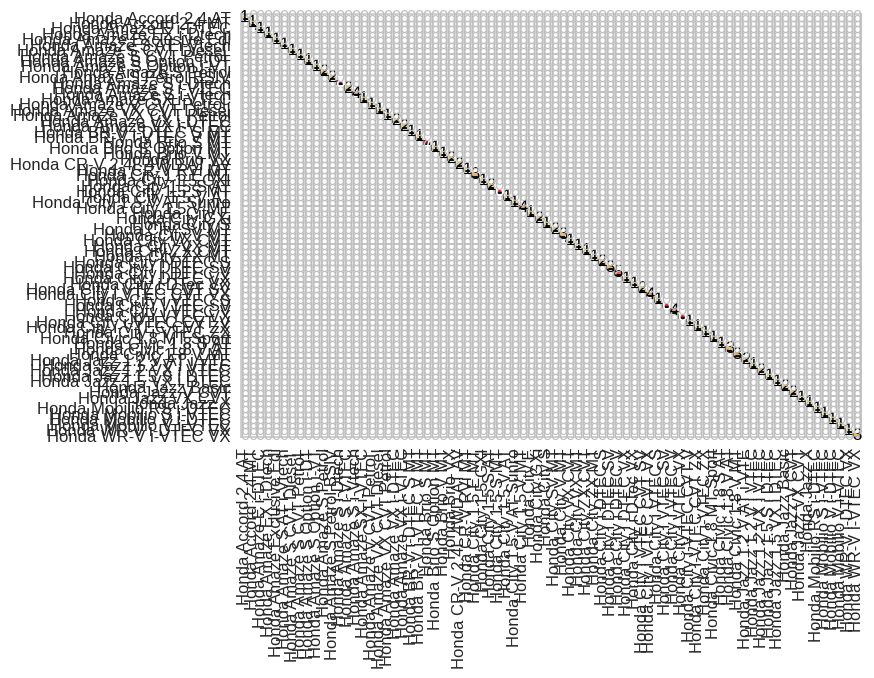

In [ ]:
cm = ConfusionMatrix(naive_car)
cm.fit(X_car_treinamento, y_car_treinamento)
cm.score(X_car_teste, y_car_teste)

In [ ]:
print(classification_report(y_car_teste, previsoes))